<a href="https://colab.research.google.com/github/Priyankavemana/Covid-Sentimental-Analysis-/blob/main/sindhu_assignment_2_pda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PDA Assignment-2

This notebook demonstrates an example of an end-to-end machine learning project. You will be instroduced to the following steps:
- Preliminary analysis
- Data preprocessing
- Model training and tuning
- Model selection

## The Problem

In this assignment, we will practice loading datasets from Pandas, visualization, and writing processing pipelines. We will work with the auto-mpg data in which each row carries information for a car model. The data has the following columns:
1.	mpg:           	mile per gallon rate of the car
2.	cylinders:     	number of cylinders the car has
3.	displacement: 	displacement of the car
4.	horsepower:    	horsepower of the car
5.	weight:        	weight of the car
6.	acceleration:  	acceleration of the car
7.	model year:    	the year the car was introduced
8.	origin:        	the development location of the car (number codes represent Asia, Europe, and North America)
9.	car name:      	model name of the car (unique for each car model)

## Loading the Data

This data is a typical csv file with headers. We can use the default settings of `read_csv()`. We can then use `head()` to examine the data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
attr =pd.read_csv('auto-mpg.csv')

In [ ]:
attr.shape

(398, 9)

## Examine the data first.

We may obtain a list of the data types for each column using the 'dtypes' command, as was previously mentioned. Similar methods like "DataFrame.info()" return extra details including the number of rows and columns, non-null count (non-missing), and column types.

Any column with a non-null count lower than the total number of rows in the dataset indicates that it has missing values that must be handled later. Pay attention to this quantity.

Our goal in this information is *car name*.You can change anything you want by filling in the spaces. Next, select the right-pointing arrow button. It's that easy!

In [ ]:
attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


Train Test Seperation


All you need to do before train/test splitting is take a quick look at the data.

As we discussed in the first session, a machine learning model is often trained to operate on future, unknowable data. In order to indicate the model's performance on unknown data rather than the data it was trained on, we need certain measurements. As a result, we partition the dataset into a training set for model training and a testing set that will be inaccessible until all models have been developed and trained.

This implies that the training set will be used to complete all subsequent steps, such as visualisation and processing. The testing set won't be touched till the evaluation is complete.

In [ ]:
from sklearn.model_selection import train_test_split

traindata, testdata = train_test_split(attr, test_size=0.25) #test_size=0.25 means that 25% of data will be for testing, 75% for training
traindata.shape, testdata.shape

((298, 9), (100, 9))

Preliminary examination

For segregating data, there are several techniques. In this case, we'll divide at random. We shall use 'train_test_split()' from'scikit-learn' for this activity. Both the input dataset and the "training:testing" size ratio must be provided. Let's note the number of rows because it is important.

In [ ]:
traindata.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,298.000000,298.000000,298.000000,295.000000,298.000000,298.000000,298.000000,298.000000
mean,23.532886,5.476510,196.303691,104.844068,2982.516779,15.533893,76.050336,1.523490
std,7.960360,1.727511,105.304077,39.180588,856.044074,2.810447,3.716487,0.779224
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2211.250000,13.900000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,95.000000,2815.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,129.000000,3612.000000,17.275000,79.000000,2.000000
max,44.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000


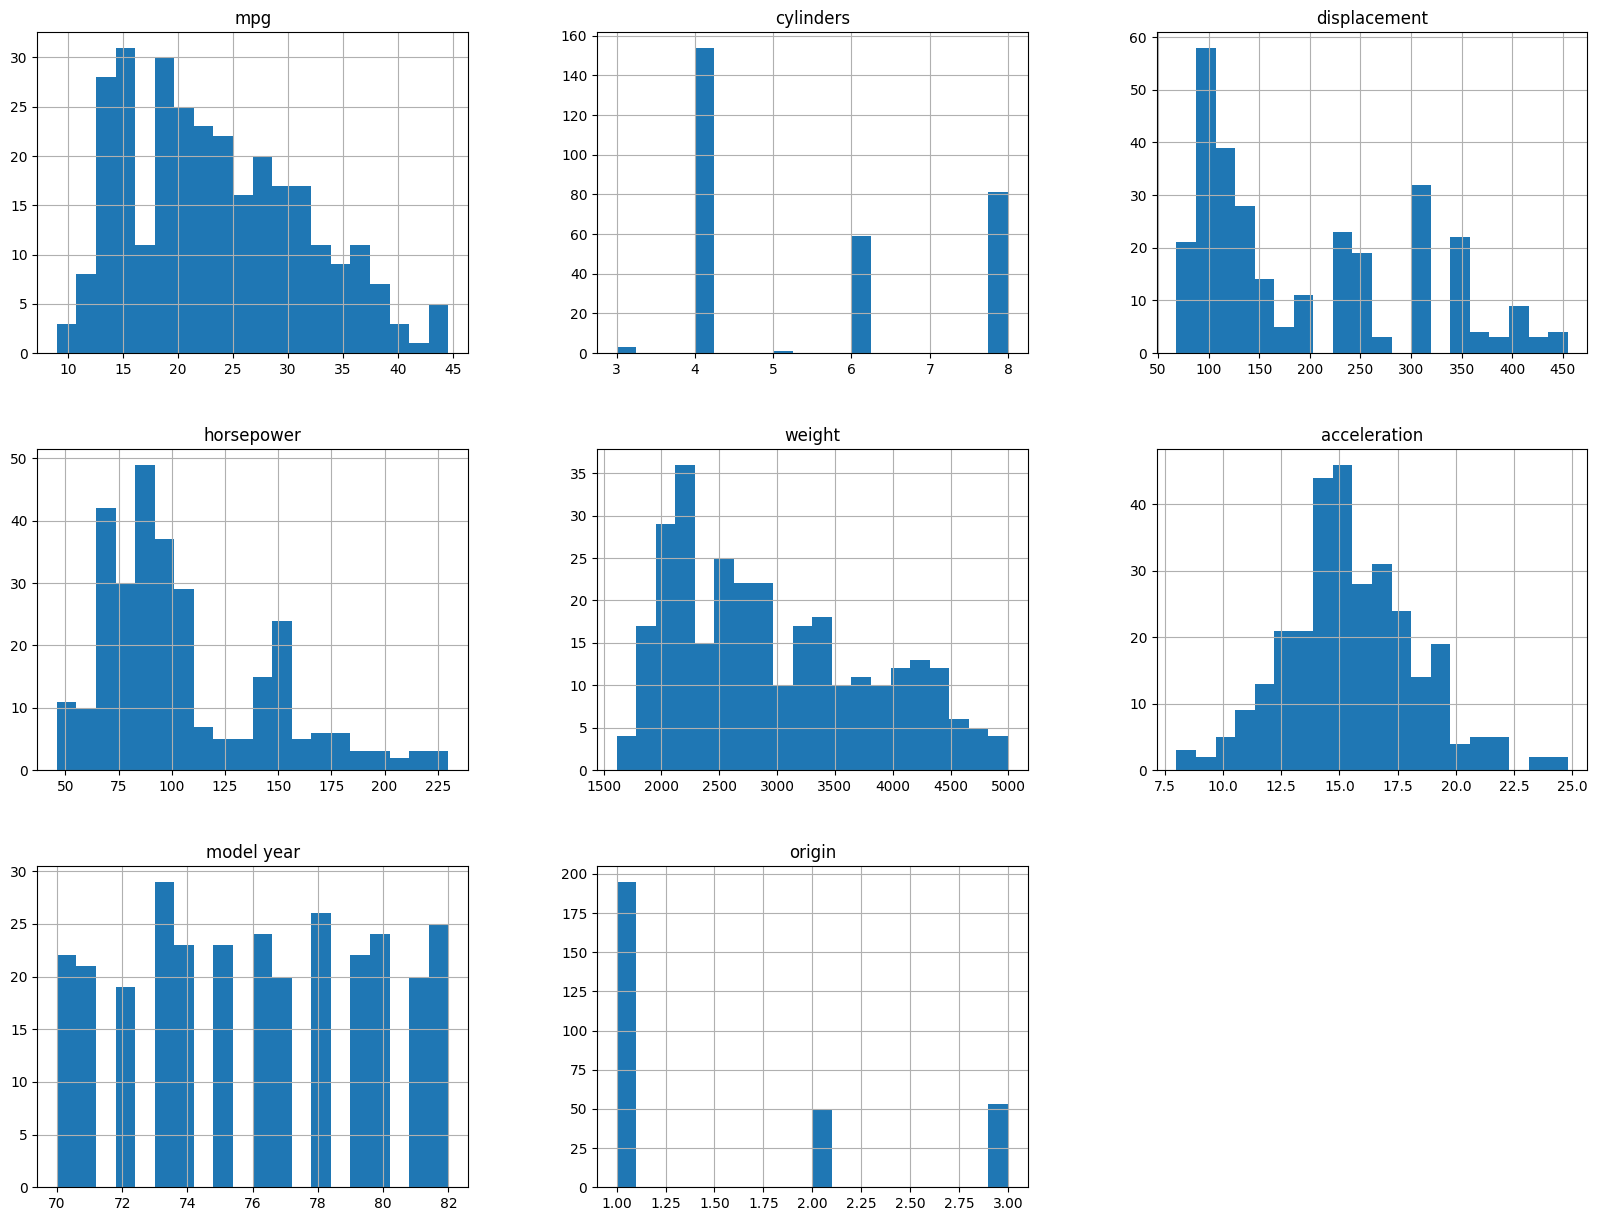

In [ ]:
from matplotlib import pyplot as plt

traindata.hist(bins=20, figsize=(20,15))
plt.show()

In [ ]:
num_cols = [column for column in attr.columns if (traindata[column].dtypes == np.int64) or (traindata[column].dtypes == np.float64)]

num_cols

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin']

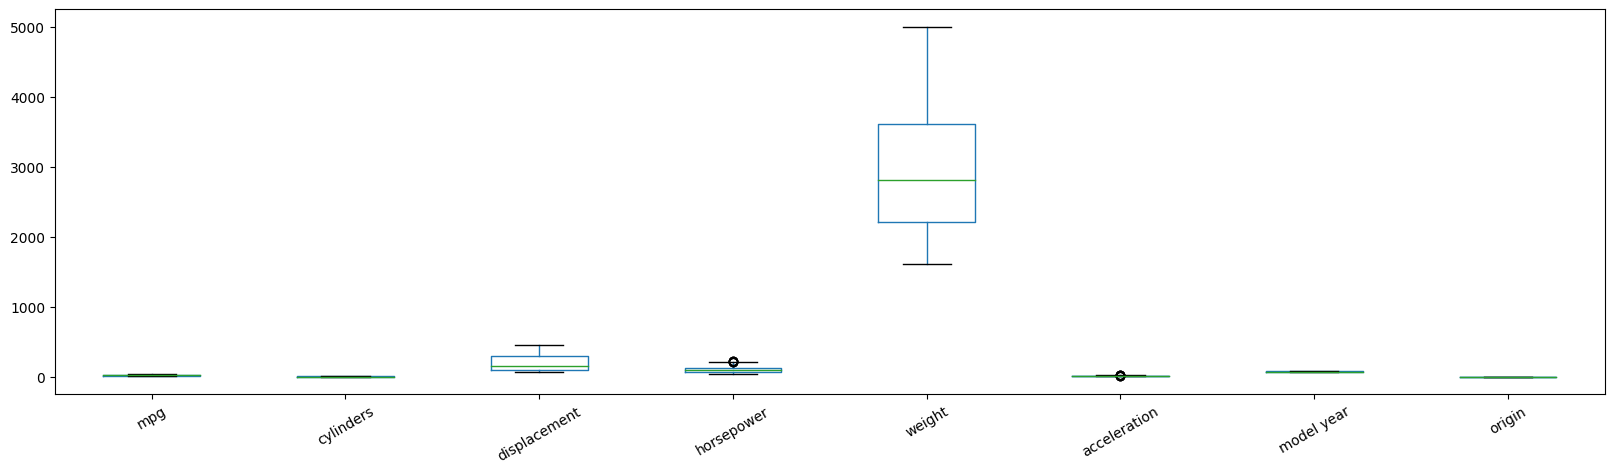

In [ ]:
traindata[num_cols].boxplot(grid=False, figsize=(20,5), rot=30)
plt.show()

In [ ]:
cat_cols = [column for column in traindata.columns if traindata[column].dtypes == object]
cat_cols

['car name']

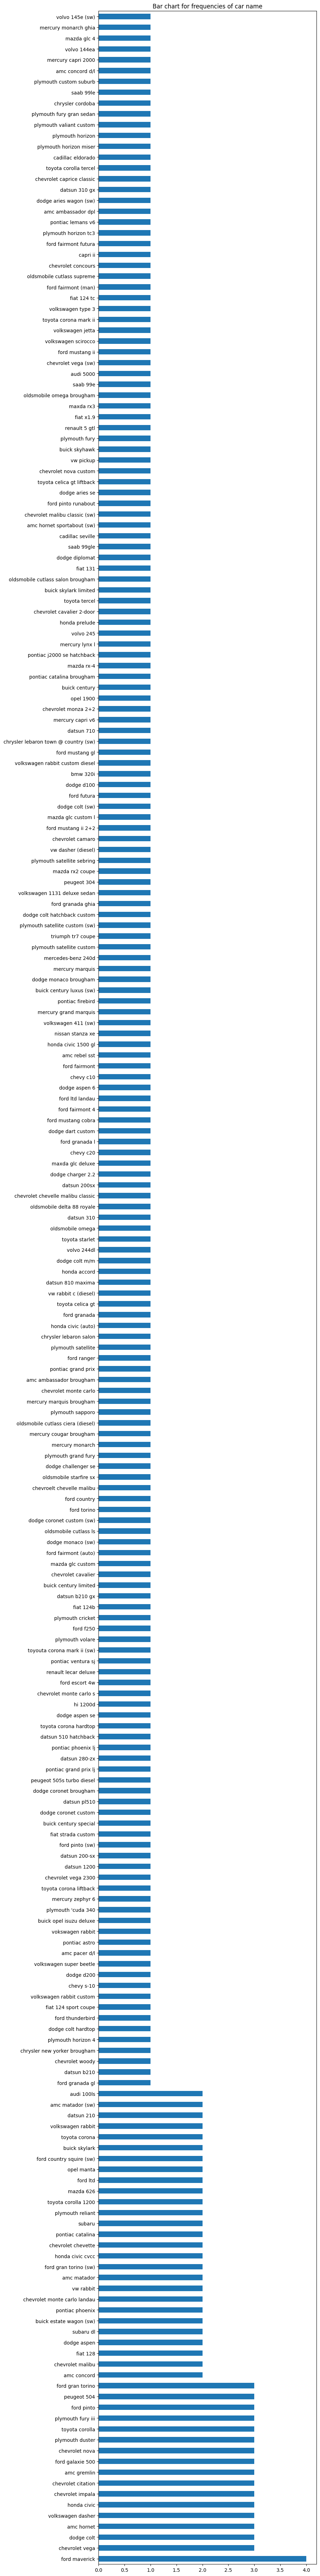

In [ ]:
for col in cat_cols:
    freq_table = traindata[col].value_counts()
    plt.figure(figsize = (8,len(freq_table)*0.4)) #a bit formatting so that chart look better
    freq_table.plot.barh(title='Bar chart for frequencies of ' + col)
    plt.show()
    print()

# Constructing

We will preprocess data using a very potent tool called a *pipeline* that is included with "scikit-learn." We may build a set of data transformations using a pipeline that greatly reduce the complexity of this step.

The data will be changed in the ways listed below:
- Symmetric numeric columns: Imputation of missing values Log transformation – Normalisation – Imputation – for skewed numerical columns, normalisation
- For categorical columns, one popular encoder

We have to give the columns for each kind of change as a consequence. The processed data will not contain any columns that are not listed here.

Important: The target must not be included in any of the input lists.

In [ ]:
num_cols = ['mpg','acceleration']                   #this list is for symmetric numeric columns
log_cols = ['displacement','horsepower','weight']   #this list is for skewed numeric columns
target = 'car name'                                 #this is the name of the target

In [ ]:
#processing pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

num_pipeline = Pipeline([                           #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),   #this step will impute missing values using column medians
    ('standardize', StandardScaler())               #this step will scale all numeric columns
])

def log_transformation(x):
    return np.log(x+0.1)

log_pipeline = Pipeline([                                        #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),                #this step will impute missing values using column medians
    ('log transform', FunctionTransformer(log_transformation)),  #this include a log transformation into the pipeline
    ('standardize', StandardScaler())                            #this step will scale all numeric columns
])

processing_pipeline = ColumnTransformer([                                                      #this transformer merges the processed numeric columns and class columns
    ('numeric', num_pipeline, num_cols),                                                       #numeric columns
    ('log', log_pipeline, log_cols),                                                           #log columns
    ('class', OneHotEncoder(max_categories=5, handle_unknown='infrequent_if_exist'), cat_cols) #encoder to transform class columns to numeric, this will automatically handle missing data
  ])

In [ ]:
processing_pipeline

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['mpg', 'acceleration']),
                                ('log',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('log transform',
                                                  FunctionTransformer(func=<function log_transformation at 0x7cef74d61ab0>)),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['displacement', 'horsepower', 'weight']),
                                ('class',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                                               max_categories=5),
                                 ['car name'])])

In [ ]:
# Fitting the pipeline
processing_pipeline.fit(traindata)

# Transform the data on training and testing
traindata_processed = processing_pipeline.transform(traindata)
testdata_processed = processing_pipeline.transform(testdata)

print('Data Trained:', traindata_processed.shape)
print('Data Tested:', testdata_processed.shape)

Data Trained: (298, 10)
Data Tested: (100, 10)
